<center><h1>U-net Architecture on Keras</h1></center>

In [0]:
# Mini U-net : This model is similar to original u-net but input and output image size are 256 X 256,

# Import

In [2]:
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, Cropping2D, Softmax
from keras.preprocessing import image

Using TensorFlow backend.


# Setting

In [0]:
image_shape = [256, 256, 3]

In [0]:
keep_prob = 0.5    # Dropout rate

In [0]:
num_of_classes = 81

# Model

In [0]:
def mini_u_net(image_shape, keep_prob, num_of_classes):
  
  # Contracting Path
  
  input_image = Input(image_shape)
  
  conv1_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_1')(input_image)
  conv1_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_2')(conv1_1)
  
  pool_1 = MaxPooling2D(name = 'pool_1')(conv1_2)
  
  conv2_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_1')(pool_1)
  conv2_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_2')(conv2_1)
  
  pool_2 = MaxPooling2D(name = 'pool_2')(conv2_2)
  
  conv3_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_1')(pool_2)
  conv3_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_2')(conv3_1)
  
  pool_3 = MaxPooling2D(name = 'pool_3')(conv3_2)
  
  conv4_1 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_1')(pool_3)
  conv4_2 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_2')(conv4_1)
  
  
  
  # Expanding Path
  
  upconv5_1 = UpSampling2D(name = 'upconv5_1')(conv4_2)
  upconv5_2 = Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv5_2')(upconv5_1)
  concat_5 = concatenate([upconv5_2, conv3_2], axis = 3, name = 'concat_5')
  
  conv5_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_1')(concat_5)
  conv5_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_2')(conv5_1)
  
  
  upconv6_1 = UpSampling2D(name = 'upconv6_1')(conv5_2)
  upconv6_2 = Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv6_2')(upconv6_1)
  concat_6 = concatenate([upconv6_2, conv2_2], axis = 3, name = 'concat_6')
  
  conv6_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_1')(concat_6)
  conv6_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_2')(conv6_1)
  
  upconv7_1 = UpSampling2D(name = 'upconv7_1')(conv6_2)
  upconv7_2 = Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv7_2')(upconv7_1)
  concat_7 = concatenate([upconv7_2, conv1_2], axis = 3, name = 'concat_7')
  
  conv7_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_1')(concat_7)
  conv7_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_2')(conv7_1)
  
  conv8 = Conv2D(filters = num_of_classes, kernel_size = (1, 1), activation = 'softmax', name = 'conv8')(conv7_2)
  
  model = Model(inputs = input_image, outputs = conv8, name = 'model')
  
  return model

In [0]:
u_net = mini_u_net(image_shape, keep_prob, num_of_classes)

In [8]:
u_net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 256, 256, 32) 9248        conv1_1[0][0]                    
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 128, 128, 32) 0           conv1_2[0][0]                    
__________________________________________________________________________________________________
conv2_1 (C

# COCO Dataset

In [0]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

from glob import glob
from PIL import Image

In [10]:
!pip install Cython
!pip install pycocotools

In [0]:
from pycocotools.coco import COCO

In [12]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [13]:
cd /gdrive/My \Drive

/gdrive/My Drive


In [14]:
# 'glob' function returns a list of paths matching a pathname pattern.

val_img_files = glob('cocoapi/images/' + '*.jp*g')
print(val_img_files[:3])

['cocoapi/images/000000136355.jpg', 'cocoapi/images/000000077460.jpg', 'cocoapi/images/000000513484.jpg']


In [15]:
# 'val_img_Ids' list contains validation images' ID. 

val_img_Ids = [int(id[-10:-4]) for id in val_img_files]
print(val_img_Ids[:3])

[136355, 77460, 513484]


In [16]:
dataDir='cocoapi'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
coco = COCO(annotation_file = annFile)

loading annotations into memory...
Done (t=0.78s)
creating index...
index created!


In [0]:
cats = coco.loadCats(coco.getCatIds())

In [0]:
# 'cat_Ids' list contains not ignore Ids but significant Ids.

cat_Ids = [cat['id'] for cat in cats]

In [0]:
categories = []
categories.append('background')

for cat in cats:
  categories.append(cat['name'])

In [20]:
print(len(categories))

81


In [0]:
def index_matching(cat_id, cat_Ids = cat_Ids, categories = categories):
  index = cat_Ids.index(cat_id)
  
  return categories[index], index, cat_id

In [0]:
def img_loader(imgIds, val_img_files):
  for img_path in val_img_files:
    if str(imgIds) in img_path:
      return img_path

In [0]:
def gt_maker(imgId, step, val_img_files = val_img_files, num_of_classes = num_of_classes, val_img_Ids = val_img_Ids):
  anns = coco.loadAnns(coco.getAnnIds(imgIds = [imgId]))
  annIds = coco.getAnnIds(imgIds = [imgId])
  img = image.img_to_array(Image.open(img_loader(imgId, val_img_files)).resize((256, 256)))
  
  
  if img.shape == (256, 256, 3):
    mask_1d = coco.annToMask(anns[0])
    
    for i in range(len(anns)):
      cat_id = anns[i]['category_id']
      _, index, _ = index_matching(cat_id)
    
      mask_ann = coco.annToMask(anns[i])
      mask_1d += mask_ann * index
    
  
    mask_1d = image.img_to_array(Image.fromarray(mask_1d).resize((256, 256)))
    
    if step % 100 == 0:
      print("End : GT Image of Id", format(imgId, '^7'), "| shape = {0}".format(mask_1d.shape), "| step : [{0} / {1}]".format(step + 1, len(val_img_Ids)))
    
  return mask_1d, img

In [24]:
input_img = []
gt_img = []
error_img = []

for i, imgId in enumerate(val_img_Ids):
  try:
    gt, img = gt_maker(imgId, i)
    gt_img.append(gt)
    input_img.append(img)
  except Exception as ex:
    print("!! Error    : GT Image of Id  {0} | step : [{1} / {2}]     Error !!".format(format(imgId, '^7'), i, len(val_img_Ids)))
    error_img.append(imgId)

End : GT Image of Id 136355  | shape = (256, 256, 1) | step : [1 / 2327]
!! Error    : GT Image of Id   98497  | step : [24 / 2327]     Error !!
!! Error    : GT Image of Id  344611  | step : [49 / 2327]     Error !!
End : GT Image of Id 568195  | shape = (256, 256, 1) | step : [101 / 2327]
!! Error    : GT Image of Id  374727  | step : [185 / 2327]     Error !!
End : GT Image of Id 117645  | shape = (256, 256, 1) | step : [201 / 2327]
!! Error    : GT Image of Id  141671  | step : [244 / 2327]     Error !!
End : GT Image of Id 205834  | shape = (256, 256, 1) | step : [301 / 2327]
End : GT Image of Id 282912  | shape = (256, 256, 1) | step : [401 / 2327]
!! Error    : GT Image of Id  353180  | step : [421 / 2327]     Error !!
End : GT Image of Id 334399  | shape = (256, 256, 1) | step : [501 / 2327]
End : GT Image of Id 252216  | shape = (256, 256, 1) | step : [601 / 2327]
!! Error    : GT Image of Id  550939  | step : [694 / 2327]     Error !!
End : GT Image of Id 175251  | shape = (2

In [0]:
# np.save('gt_img_116.npy', np.asarray(gt_img))

In [0]:
input_array = np.array(input_img)
gt_array = np.array(gt_img)

In [27]:
print(input_array.shape, gt_array.shape)

(2299, 256, 256, 3) (2299, 256, 256, 1)


# Compile

In [0]:
import keras.backend as K
import tensorflow as tf

def custom_cross_entropy(y_true, y_pred):
	
  true_shape = K.shape(y_true)
  pred_shape = K.shape(y_pred)
  
  # reshape such that w and h dim are multiplied together
  y_true_reshaped = K.reshape( y_true, tf.stack( [-1, true_shape[1] * true_shape[2], true_shape[-1]] ) )
  y_pred_reshaped = K.reshape( y_pred, tf.stack( [-1, pred_shape[1] * pred_shape[2], pred_shape[-1]] ) )

	# correctly classified
  y_true_reshaped = tf.cast(y_true_reshaped, tf.int32)
  y_true_one = K.one_hot(y_true_reshaped, num_classes = pred_shape[-1])
  y_true_one = K.reshape(y_true_one, tf.stack( [-1, K.shape(y_true_one)[1], pred_shape[-1]]))
  
  
  return -K.mean(y_true_one * K.log(y_pred_reshaped)) 

In [0]:
import keras.backend as K
import tensorflow as tf

def mean_acc(y_true, y_pred):
	
  true_shape = K.shape(y_true)
  pred_shape = K.shape(y_pred)
  
  # reshape such that w and h dim are multiplied together
  y_true_reshaped = K.reshape( y_true, tf.stack( [-1, true_shape[1] * true_shape[2], true_shape[-1]] ))
  y_pred_reshaped = K.reshape( y_pred, tf.stack( [-1, pred_shape[1] * pred_shape[2], pred_shape[-1]] ) )

	# correctly classified
  y_true_reshaped = tf.cast(y_true_reshaped, tf.int64)
  y_true_one = K.one_hot(y_true_reshaped, num_classes = pred_shape[-1])
  y_true_one = K.reshape(y_true_one, tf.stack( [-1, K.shape(y_true_one)[1], pred_shape[-1]]))
  
  y_pred_argmax = K.argmax(y_pred_reshaped, axis = 2)
  y_pred_argmax = K.reshape(y_pred_argmax, K.shape(y_true_reshaped))
  
  equal_entries = tf.cast(K.equal(y_true_reshaped, y_pred_argmax), tf.int64)

  correct_pixels_per_class = K.sum(equal_entries, axis=1)
  
  n_pixels_per_class = tf.cast(K.shape(equal_entries)[1] * K.shape(equal_entries)[2], tf.int64)

  acc = correct_pixels_per_class / n_pixels_per_class
  # acc_mask = tf.is_finite(acc)
  # acc_masked = tf.boolean_mask(acc,acc_mask)
  
  return acc

In [0]:
u_net.compile(optimizer = 'sgd', loss = custom_cross_entropy, metrics = [mean_acc])

# Training

In [35]:
r = u_net.fit(x = input_array, y = gt_array, validation_split = 0.1, epochs = 20)

Train on 2069 samples, validate on 230 samples
Epoch 1/20
2069/2069 [==============================] - 126s 61ms/step - loss: 0.0242 - mean_acc: 0.7679 - val_loss: 0.0245 - val_mean_acc: 0.7499
Epoch 2/20
2069/2069 [==============================] - 126s 61ms/step - loss: 0.0242 - mean_acc: 0.7680 - val_loss: 0.0244 - val_mean_acc: 0.7503
Epoch 3/20
2069/2069 [==============================] - 126s 61ms/step - loss: 0.0241 - mean_acc: 0.7682 - val_loss: 0.0243 - val_mean_acc: 0.7504
Epoch 4/20
2069/2069 [==============================] - 125s 61ms/step - loss: 0.0240 - mean_acc: 0.7683 - val_loss: 0.0244 - val_mean_acc: 0.7506
Epoch 5/20
2069/2069 [==============================] - 126s 61ms/step - loss: 0.0240 - mean_acc: 0.7685 - val_loss: 0.0242 - val_mean_acc: 0.7506
Epoch 6/20
2069/2069 [==============================] - 126s 61ms/step - loss: 0.0239 - mean_acc: 0.7685 - val_loss: 0.0242 - val_mean_acc: 0.7508
Epoch 7/20
2069/2069 [==============================] - 126s 61ms/step 

# Plot Some Data

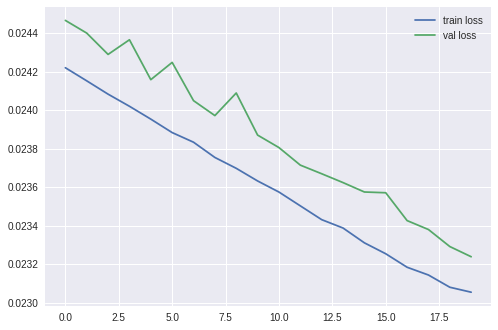

In [36]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

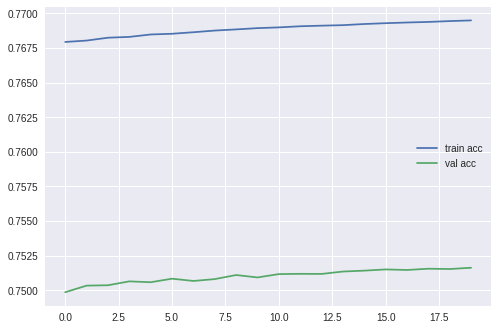

In [37]:
# accuracies
plt.plot(r.history['mean_acc'], label='train acc')
plt.plot(r.history['val_mean_acc'], label='val acc')
plt.legend()
plt.show()